In [ ]:
"""
Purpose: To process and save the inhibitory and excitatory neurons

"""

In [1]:
from os import sys
sys.path.append("/meshAfterParty/")

In [2]:
from importlib import reload
import os
from pathlib import Path
os.getcwd()

import neuron_utils as nru
nru = reload(nru)
import neuron
neuron=reload(neuron)
import neuron_visualizations as nviz
import time
import system_utils as su

# Getting all of the meshes to process

In [3]:
curr_dir = Path("./inhibitory_excitatory")
neuron_files = list(curr_dir.iterdir())
inhibitory_cells = [k for k in neuron_files if "_inhibitory_" in str(k)]
inhibitory_cells

[PosixPath('inhibitory_excitatory/100224677766544793_inhibitory_2.off'),
 PosixPath('inhibitory_excitatory/90725377802114822_inhibitory_7.off'),
 PosixPath('inhibitory_excitatory/91076260457105133_inhibitory_1.off'),
 PosixPath('inhibitory_excitatory/94807590202431271_inhibitory_6.off'),
 PosixPath('inhibitory_excitatory/94947778404616212_inhibitory_0.off'),
 PosixPath('inhibitory_excitatory/95863464559589949_inhibitory_8.off'),
 PosixPath('inhibitory_excitatory/96635940332067691_inhibitory_3.off'),
 PosixPath('inhibitory_excitatory/96918240344827455_inhibitory_5.off'),
 PosixPath('inhibitory_excitatory/97338459408083949_inhibitory_9.off'),
 PosixPath('inhibitory_excitatory/98253734185848323_inhibitory_4.off')]

In [4]:
import system_utils as su
for j,curr_file in enumerate(inhibitory_cells):
    print(f"File {j} size = {su.get_file_size(curr_file)/1000/1000}")

File 0 size = 26.513649
File 1 size = 5.601935
File 2 size = 21.542744
File 3 size = 39.666377999999995
File 4 size = 36.644079
File 5 size = 9.132599
File 6 size = 13.388228
File 7 size = 12.610147999999999
File 8 size = 8.747961
File 9 size = 21.87022


# processing the inhibitory cells, meshparty

In [5]:

"""
Pseudocode:
1) Load in the mesh
2) extract out segment_id and description
3) process the neuron using MP and save output
4) Process neuron using MAP and save output


"""
import time
import neuron
neuron = reload(neuron)


process_type = "meshafterparty"
cell_type = "inhibitory"


for j,inh_mesh_file in enumerate(inhibitory_cells):
    print(f"\n\n----- Working on: {inh_mesh_file} ---- \n")
    if j != 1:
        continue
    #1) Load in the mesh
    import trimesh_utils as tu
    current_neuron_mesh = tu.load_mesh_no_processing(str(inh_mesh_file.absolute()))
    
    #2) extract out segment_id and description
    file_parts = str(inh_mesh_file.name)[:-4].split("_")

    segment_id=int(file_parts[0])
    description = "_".join(file_parts[1:])
    
    #3) process the neuron using MP and save output
    
    meshparty_time = time.time()
    
    current_neuron_inh = neuron.Neuron(
            mesh=current_neuron_mesh,
            segment_id=segment_id,
            description=description,
            decomposition_type=process_type,
            #somas = somas_inh,
            #branch_skeleton_data=branch_skeleton_data,
            suppress_preprocessing_print=True,
            suppress_output=False)
    
    print(f"Total time for processing: {time.time() - meshparty_time}")

    # -- save output --
    output_folder = curr_dir / Path(f"{cell_type}_{process_type}")
    output_folder.mkdir(parents=True,exist_ok=True)
    
    current_neuron_inh.save_compressed_neuron(
        output_folder = output_folder,
        file_name=f"{current_neuron_inh.segment_id}_{current_neuron_inh.description}_{process_type}",
        suppress_output=True
        
    )
    



----- Working on: inhibitory_excitatory/100224677766544793_inhibitory_2.off ---- 



----- Working on: inhibitory_excitatory/90725377802114822_inhibitory_7.off ---- 

--- 0) Having to preprocess the Neuron becuase no preprocessed data
Please wait this could take a while.....
--- 0) Total time for preprocessing: 91.27144312858582




--- 1) Finished unpacking preprocessed materials: 1.1920928955078125e-05
total_edges = [['S0', 'L0'], ['S0', 'L1'], ['S0', 'L2'], ['S0', 'L3'], ['S0', 'L4']]
--- 2) Finished creating neuron connectivity graph: 0.00011897087097167969
Having to generate soma_meshes_face_idx because none in preprocessed data
--- 3a) Finshed generating soma_meshes_face_idx: 0.09397029876708984
Using the close holes feature for watertightness in soma_volume_ratio
IN INPUT FILE VALIDATION LOOP
LEAVING LOOP, MESH VALIDATED
Using port = 6972
xvfb-run -n 6972 -s "-screen 0 800x600x24" meshlabserver $@  -i /examples/test_neurons/temp/neuron_None.off -o /examples/test_neurons/temp/n


Working on limb L0 branch 7



Working on limb L0 branch 11



Working on limb L0 branch 5



Working on limb L0 branch 10



Working on limb L0 branch 2



Working on limb L0 branch 4



Working on limb L0 branch 8



Working on limb L0 branch 9



Working on limb L0 branch 0



Working on limb L0 branch 1



Working on limb L0 branch 3



Working on limb L0 branch 6



Working on limb L1 branch 6



Working on limb L1 branch 2



Working on limb L1 branch 4



Working on limb L1 branch 0



Working on limb L1 branch 1



Working on limb L1 branch 3



Working on limb L1 branch 5



Working on limb L2 branch 1



Working on limb L2 branch 0



Working on limb L2 branch 2



Working on limb L2 branch 3



Working on limb L2 branch 4



Working on limb L3 branch 0



Working on limb L4 branch 0



There was only one mesh found from the spine process and mesh split, returning empty array



There was only one mesh found from the spine process and mesh split, returning empty array



Working on limb L0 branch 12



Working on limb L0 branch 7



Working on limb L0 branch 11



Working on limb L0 branch 5



Working on limb L0 branch 10



Working on limb L0 branch 2



Working on limb L0 branch 4



Working on limb L0 branch 8



Working on limb L0 branch 9



Working on limb L0 branch 0



Working on limb L0 branch 1



Working on limb L0 branch 3



Working on limb L0 branch 6



Working on limb L1 branch 6



Working on limb L1 branch 2



Working on limb L1 branch 4



Working on limb L1 branch 0



Working on limb L1 branch 1



Working on limb L1 branch 3



Working on limb L1 branch 5



Working on limb L2 branch 1



Working on limb L2 branch 0



Working on limb L2 branch 2



Working on limb L2 branch 3



Working on limb L2 branch 4



Working on limb L3 branch 0



Working on limb L4 branch 0



Working on limb L0 branch 12



Working on limb L0 branch 7



Working on limb L0 branch 11



Working on limb L0 branch 5



Working on limb L0 branch 10



Working on limb L0 branch 2



Working on limb L0 branch 4



Working on limb L0 branch 8



Working on limb L0 branch 9



Working on limb L0 branch 0



Working on limb L0 branch 1



Working on limb L0 branch 3



Working on limb L0 branch 6



Working on limb L1 branch 6



Working on limb L1 branch 2



Working on limb L1 branch 4



Working on limb L1 branch 0



Working on limb L1 branch 1



Working on limb L1 branch 3



Working on limb L1 branch 5



Working on limb L2 branch 1



Working on limb L2 branch 0



Working on limb L2 branch 2



Working on limb L2 branch 3



Working on limb L2 branch 4



Working on limb L3 branch 0



Working on limb L4 branch 0



Total time for neuron instance creation = 117.13526940345764
Total time for processing: 117.13537955284119
Saving Neuorn in suppress_output mode...please wait
Saved File at location: inhibitory_excitatory/inhibitory_meshafterparty/90725377802114822_inhibitory_7_meshafterparty


----- Working on: inhibitory_excitatory/91076260457105133_inhibitory_1.off ---- 



----- Working on: inhibitory_excitatory/94807590202431271_inhibitory_6.off ---- 



----- Working on: inhibitory_excitatory/94947778404616212_inhibitory_0.off ---- 



----- Working on: inhibitory_excitatory/95863464559589949_inhibitory_8.off ---- 



----- Working on: inhibitory_excitatory/96635940332067691_inhibitory_3.off ---- 



----- Working on: inhibitory_excitatory/96918240344827455_inhibitory_5.off ---- 



----- Working on: inhibitory_excitatory/97338459408083949_inhibitory_9.off ---- 



----- Working on: inhibitory_excitatory/98253734185848323_inhibitory_4.off ---- 



# Loading the saved mesh to check that everything saved correctly

In [6]:
import neuron_utils as nru
nru = reload(nru)
nviz = reload(nviz)

In [7]:
recovered_neuron = nru.decompress_neuron(filepath="./inhibitory_excitatory/inhibitory_meshafterparty/90725377802114822_inhibitory_7_meshafterparty",
                     original_mesh="./inhibitory_excitatory/90725377802114822_inhibitory_7.off")

Decompressing Neuron in minimal output mode...please wait


In [8]:
curr_branch = recovered_neuron[0][0]
nviz.plot_objects(meshes=curr_branch.mesh,
                 skeletons=curr_branch.skeleton)

In [9]:
nviz.plot_spines(recovered_neuron)


 Working on visualization type: mesh


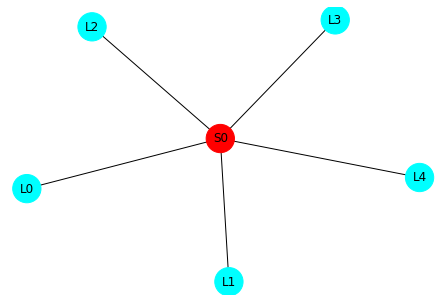

In [10]:
recovered_neuron.plot_soma_limb_concept_network()

In [11]:
returned_color_dict = nviz.visualize_neuron(
    
    recovered_neuron,
    visualize_type=["mesh","skeleton"],
    limb_branch_dict="all",
    mesh_resolution="limb",
    skeleton_resolution="limb",
    mesh_color_alpha=0.2,
    return_color_dict=True,
    

)


 Working on visualization type: mesh

 Working on visualization type: skeleton


Recieved another instance of Neuron class in init -- so just copying data


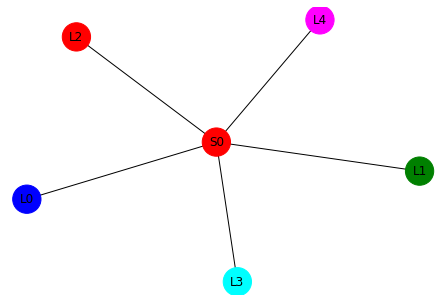

In [12]:
nviz = reload(nviz)
neuron=reload(neuron)
recovered_neuron=neuron.Neuron(recovered_neuron)
recovered_neuron.plot_soma_limb_concept_network(node_colors=returned_color_dict,
                                                node_size=800)

# Seeing if can filter away the spines that are just from endpoints

In [18]:
tu = reload(tu)

SyntaxError: can't assign to function call (trimesh_utils.py, line 1231)

In [19]:
filled_branch = tu.fill_holes(curr_branch.mesh)
filled_branch

IN INPUT FILE VALIDATION LOOP
LEAVING LOOP, MESH VALIDATED
Using port = 2866
xvfb-run -n 2866 -s "-screen 0 800x600x24" meshlabserver $@  -i /examples/test_neurons/temp/neuron_None.off -o /examples/test_neurons/temp/neuron_None_fill_holes.off -s /examples/test_neurons/temp/fill_holes_900028.mls
removed temporary input file: /examples/test_neurons/temp/neuron_None.off
removed temporary output file: /examples/test_neurons/temp/neuron_None_fill_holes.off


<trimesh.Trimesh(vertices.shape=(3297, 3), faces.shape=(6602, 3))>

(256, 3)

In [28]:
filled_branch.contains(curr_branch.skeleton.reshape(-1,3))

array([ True, False, False,  True,  True,  True,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
        True, False, False,  True,  True,  True,  True, False, False,
        True,  True,  True,  True, False, False, False, False, False,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False, False, False, False,  True,  True, False,
       False,  True,  True, False, False, False, False, False, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False, False, False, False, False, False, False, False,
        True,  True,  True,  True, False, False, False, False, False,
       False, False, False,  True,  True,  True,  True,  True,  True,
       False, False, False, False,  True,  True,  True,  True, False,
       False,  True,

In [40]:
find_skeleton_endpoint_coordinates(curr_limb.skeleton)

array([[797194., 979092., 751986.],
       [805443., 953489., 750451.],
       [848958., 961460., 740691.],
       [854232., 991139., 742612.]])

In [37]:
nviz.plot_objects(meshes=[curr_limb.mesh],
                 scatters=[endpoint_coordinates.reshape(-1,3)],
                 scatter_size=5)

In [48]:
neuron = reload(neuron)
recovered_neuron = neuron.Neuron(recovered_neuron)
curr_limb = recovered_neuron[2]

Recieved another instance of Neuron class in init -- so just copying data


In [56]:
sk = reload(sk)
nviz.plot_objects(main_mesh=curr_limb.mesh,meshes= curr_limb.spines,meshes_colors="red",
                 scatters=sk.find_skeleton_endpoint_coordinates(curr_limb.skeleton),scatter_size=0.2)

In [117]:
tu = reload(tu)
neuron = reload(neuron)
recovered_neuron = neuron.Neuron(recovered_neuron)

recovered_neuron.calculate_spines(print_flag=True)

Recieved another instance of Neuron class in init -- so just copying data
query = median_mesh_center > 200 and n_faces_branch>100
smoothness_threshold = 0.08
The median_mesh_center was requested and HAS already been calculated
new_branch_dict = {'L0': array([ 0,  1,  2,  5,  6,  7,  8,  9, 10, 11, 12]), 'L1': array([0, 2, 3, 4, 5, 6]), 'L2': array([1, 2, 3, 4]), 'L3': array([0]), 'L4': array([0])}
Working on limb L0 branch 0



--> n_spines found before filtering = 5
Using the filter_out_border_spines option
Using the skeleton_endpoint_nullification option
--> n_spines found = 3
Working on limb L0 branch 1



--> n_spines found before filtering = 1
Using the filter_out_border_spines option
Using the skeleton_endpoint_nullification option
--> n_spines found = 0
Working on limb L0 branch 2



--> n_spines found before filtering = 0
Using the filter_out_border_spines option
Using the skeleton_endpoint_nullification option
--> n_spines found = 0
Working on limb L0 branch 5



--> n_spines found before filtering = 0
Using the filter_out_border_spines option
Using the skeleton_endpoint_nullification option
--> n_spines found = 0
Working on limb L0 branch 6



--> n_spines found before filtering = 1
Using the filter_out_border_spines option
Using the skeleton_endpoint_nullification option
--> n_spines found = 1
Working on limb L0 branch 7



--> n_spines found before filtering = 2
Using the filter_out_border_spines option
Using the skeleton_endpoint_nullification option
--> n_spines found = 0
Working on limb L0 branch 8



--> n_spines found before filtering = 1
Using the filter_out_border_spines option
Using the skeleton_endpoint_nullification option
--> n_spines found = 0
Working on limb L0 branch 9



--> n_spines found before filtering = 0
Using the filter_out_border_spines option
Using the skeleton_endpoint_nullification option
--> n_spines found = 0
Working on limb L0 branch 10



There was only one mesh found from the spine process and mesh split, returning empty array
--> n_spines found before filtering = 0
Using the filter_out_border_spines option
Using the skeleton_endpoint_nullification option
--> n_spines found = 0
Working on limb L0 branch 11



--> n_spines found before filtering = 1
Using the filter_out_border_spines option
Using the skeleton_endpoint_nullification option
--> n_spines found = 0
Working on limb L0 branch 12



There was only one mesh found from the spine process and mesh split, returning empty array
--> n_spines found before filtering = 0
Using the filter_out_border_spines option
Using the skeleton_endpoint_nullification option
--> n_spines found = 0
Working on limb L1 branch 0



--> n_spines found before filtering = 2
Using the filter_out_border_spines option
Using the skeleton_endpoint_nullification option
--> n_spines found = 0
Working on limb L1 branch 2



--> n_spines found before filtering = 6
Using the filter_out_border_spines option
Using the skeleton_endpoint_nullification option
--> n_spines found = 3
Working on limb L1 branch 3



--> n_spines found before filtering = 0
Using the filter_out_border_spines option
Using the skeleton_endpoint_nullification option
--> n_spines found = 0
Working on limb L1 branch 4



--> n_spines found before filtering = 1
Using the filter_out_border_spines option
Using the skeleton_endpoint_nullification option
--> n_spines found = 1
Working on limb L1 branch 5



--> n_spines found before filtering = 2
Using the filter_out_border_spines option
Using the skeleton_endpoint_nullification option
--> n_spines found = 1
Working on limb L1 branch 6



--> n_spines found before filtering = 4
Using the filter_out_border_spines option
Using the skeleton_endpoint_nullification option
--> n_spines found = 1
Working on limb L2 branch 1



--> n_spines found before filtering = 0
Using the filter_out_border_spines option
Using the skeleton_endpoint_nullification option
--> n_spines found = 0
Working on limb L2 branch 2



--> n_spines found before filtering = 1
Using the filter_out_border_spines option
Using the skeleton_endpoint_nullification option
--> n_spines found = 1
Working on limb L2 branch 3



--> n_spines found before filtering = 2
Using the filter_out_border_spines option
Using the skeleton_endpoint_nullification option
--> n_spines found = 0
Working on limb L2 branch 4



--> n_spines found before filtering = 2
Using the filter_out_border_spines option
Using the skeleton_endpoint_nullification option
--> n_spines found = 1
Working on limb L3 branch 0



--> n_spines found before filtering = 4
Using the filter_out_border_spines option
Using the skeleton_endpoint_nullification option
--> n_spines found = 1
Working on limb L4 branch 0



--> n_spines found before filtering = 3
Using the filter_out_border_spines option
Using the skeleton_endpoint_nullification option
--> n_spines found = 0


In [118]:
nviz.plot_spines(recovered_neuron)


 Working on visualization type: mesh


In [98]:
returned_color_dict = nviz.visualize_neuron(recovered_neuron,
                      limb_branch_dict="all",
                     mesh_resolution="limb",
                     return_color_dict=True)


 Working on visualization type: mesh


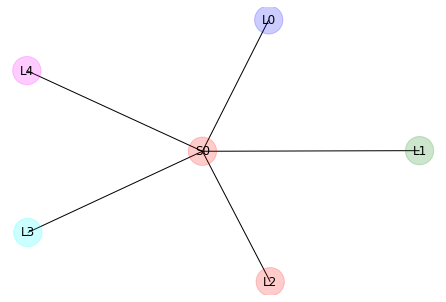

In [99]:
recovered_neuron.plot_soma_limb_concept_network(node_colors=returned_color_dict)

In [115]:
curr_limb = recovered_neuron[0]
sk = reload(sk)
nviz = reload(nviz)
sp_idx = 4
nviz.plot_objects(main_mesh=curr_limb.mesh,
                  meshes=curr_limb.spines[sp_idx],
                  meshes_colors="black",
                  scatter_size=1,
                  scatters=[curr_limb.spines[sp_idx].vertices],
                  
                  mesh_alpha=1
                 )

In [116]:
tu = reload(tu)
tu.filter_meshes_by_containing_coordinates(curr_limb.spines,
                                           sk.find_skeleton_endpoint_coordinates(curr_limb.skeleton),
                                           distance_threshold=500,
                                           verbose=True)

Submesh 0 (<trimesh.Trimesh(vertices.shape=(26, 3), faces.shape=(46, 3))>) distances = [45128.20030103  3315.77751968 97527.74422291 22503.88428272
 89595.0524706  70266.50400874 68157.24625753 70059.25228127]
Min distance 3315.777519677709
contains_results = [False False False False False False False False]

Submesh 1 (<trimesh.Trimesh(vertices.shape=(22, 3), faces.shape=(38, 3))>) distances = [ 18383.76588107  27571.12115983 116918.02699349  49033.85283669
 113777.89743711  97457.19223644  94327.75383634  98053.96852555]
Min distance 18383.765881070183
contains_results = [False False False False False False False False]

Submesh 2 (<trimesh.Trimesh(vertices.shape=(14, 3), faces.shape=(22, 3))>) distances = [ 10392.1934191   35010.39003125 124059.56990793  56770.13392744
 121354.84355616 105061.06602515 102117.65299761 105647.64127675]
Min distance 10392.193419100693
contains_results = [False False False False False False False False]

Submesh 3 (<trimesh.Trimesh(vertices.shape=(27, 3

[<trimesh.Trimesh(vertices.shape=(26, 3), faces.shape=(46, 3))>,
 <trimesh.Trimesh(vertices.shape=(22, 3), faces.shape=(38, 3))>,
 <trimesh.Trimesh(vertices.shape=(14, 3), faces.shape=(22, 3))>,
 <trimesh.Trimesh(vertices.shape=(27, 3), faces.shape=(47, 3))>]

In [91]:
import trimesh
import numpy as np
tu = reload(tu)

curr_limb = recovered_neuron[2]
curr_limb_end_coords = find_skeleton_endpoint_coordinates(curr_limb.skeleton)


kept_spines = []

for curr_branch in curr_limb:
    #a) get the spines
    curr_spines = curr_branch.spines

    #For each spine:
    if not curr_spines is None:
        curr_kept_spines = tu.filter_meshes_by_bbox_containing_coordinates(curr_spines,
                                                                        curr_limb_end_coords)
        print(f"curr_kept_spines = {curr_kept_spines}")
        kept_spines += curr_kept_spines

nviz.plot_objects(meshes=kept_spines)

curr_kept_spines = [<trimesh.Trimesh(vertices.shape=(121, 3), faces.shape=(230, 3))>]
curr_kept_spines = []
curr_kept_spines = [<trimesh.Trimesh(vertices.shape=(35, 3), faces.shape=(59, 3))>, <trimesh.Trimesh(vertices.shape=(21, 3), faces.shape=(35, 3))>]


In [87]:
"""
Pseudocode: 
1) Get all of the endpoints of the limb skeleton
For each branch: 
    a) get the spines
    For each spine:
        i) close up holes
        ii) Test if any endpoints are inside spine
        iii) If yes --> then nullify


"""





In [82]:
type(nullified_spines)

list

In [74]:
curr_limb.spines[1].bounding_box_oriented.volume > curr_limb.spines[1].bounding_box.volume

False

In [76]:
curr_limb.spines[1].contains(curr_limb_end_coords.reshape(-1,3))

array([False, False, False, False])

In [68]:
sp_m

<trimesh.Trimesh(vertices.shape=(35, 3), faces.shape=(59, 3))>

In [62]:
nullified_spines

[]

# Visualizing the Branches

In [ ]:
returned_color_dict = nviz.visualize_neuron(
    
    recovered_neuron,
    visualize_type=["mesh","skeleton"],
    limb_branch_dict="all",
    #mesh_resolution="limb",
    #skeleton_resolution="limb",
    mesh_color_alpha=0.2,
    return_color_dict=True,
    

)

In [ ]:
nviz.plot_limb_concept_network_2D?

In [ ]:
nviz.plot_limb_concept_network_2D(recovered_neuron,
                                 limb_name='L0',
                                 node_colors=returned_color_dict,
                                 font_size=40,
                                 node_size=8000,fig_height=40)

In [ ]:
nviz.plot_spines(recovered_neuron)

In [ ]:
import trimesh_utils as tu
tu.filter_away_border_touching_submeshes?

In [ ]:
# Things need to investigate:
tu = reload(tu)
[len(k) for k in tu.find_border_vertex_groups(curr_branch.mesh)]

In [ ]:
spine_submesh_split_filtered = tu.filter_away_border_touching_submeshes(
    curr_branch,curr_branch.spines)

In [ ]:
[curr_branch.mesh.vertices[list(k)].reshape(-1,3) for k in 
                                      tu.find_border_vertex_groups(curr_branch.mesh)]

In [ ]:
import skeleton_utils as sk
import trimesh_utils as tu
sk = reload(sk)
nviz = reload(nviz)
curr_branch = recovered_neuron[0][9]
nviz.plot_objects(meshes=[curr_branch.mesh] + curr_branch.spines,
                  meshes_colors=["black","red"],
                 skeletons=[curr_branch.skeleton],
                 scatters=[curr_branch.mesh.vertices[list(k)].reshape(-1,3) for k in 
                                      tu.find_border_edge_groups(curr_branch.mesh)],
                 scatter_size=2)

In [ ]:
ex_box

In [ ]:
tu = reload(tu)
tu.find_border_vertex_groups(curr_branch.mesh)

In [ ]:
import trimesh
ex_box = trimesh.creation.box()
nviz.plot_objects(meshes=[ex_box])